In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_victoria_basin = pd.read_csv('Victoria-basin-historic-and-projected-rainfall.csv')

In [3]:
df_victoria_basin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sub_Region  144 non-null    object 
 1   Time        144 non-null    int64  
 2   Jan.        140 non-null    float64
 3   Feb.        140 non-null    float64
 4   March       140 non-null    float64
 5   April       140 non-null    float64
 6   May         140 non-null    float64
 7   June        140 non-null    float64
 8   July        140 non-null    float64
 9   Aug.        140 non-null    float64
 10  Sept.       144 non-null    float64
 11  Oct.        144 non-null    float64
 12  Nov.        144 non-null    float64
 13  Dec.        144 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 15.9+ KB


The dataset has very few missing values that will barely affect our results thus We can drop the null values and proceed to use the dataset. 


In [4]:
df_victoria_basin.dropna()

,Sub_Region,Time,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
1,Simiyu,2001,11.382,0.270,0.290,4.074,2.814,0.246,0.250,0.092,0.254,0.252,6.435,4.617
2,Simiyu,2002,4.705,0.299,4.341,2.655,7.199,0.265,0.395,0.053,0.470,0.882,4.839,0.610
3,Simiyu,2003,1.550,0.091,4.110,10.559,16.406,0.034,0.553,0.208,0.102,0.416,7.707,1.517
4,Simiyu,2004,6.224,1.386,0.816,7.012,0.874,0.111,0.157,0.395,4.387,0.386,0.064,8.113
5,Simiyu,2005,0.982,2.960,1.173,0.235,6.626,0.053,0.124,0.031,0.226,0.400,1.218,2.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Kagera,2031,0.940,0.456,0.881,5.974,1.784,2.074,1.041,0.420,2.935,3.196,2.729,1.038
140,Kagera,2032,0.101,0.751,0.843,16.416,3.614,0.187,0.642,0.326,0.216,8.315,9.062,0.411
141,Kagera,2033,3.161,1.590,4.383,2.180,3.980,0.129,0.042,1.655,2.062,0.945,0.184,0.432
142,Kagera,2034,1.374,0.050,6.015,5.827,3.689,0.204,0.124,1.970,0.099,0.175,3.988,2.528


After looking through the data, we can explore things like:
1. The statistical summaries like minimum, maximum and mean rainfall.
2. Finding the annual rainfall amount in each sub region.
3. Sub regions with have highest and lowest rainfalls
4. The annual rainfall trend in whole Victoria basin region.
5. The year with the highest and lowest rainfall amount.


In [5]:
df_victoria_basin.describe()

,Time,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
count,144.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,144.000000,144.000000,144.000000,144.000000
mean,2017.500000,2.414143,2.408057,3.535914,5.156879,5.483650,1.979221,1.017064,1.906993,2.929187,3.791278,4.011104,2.915396
std,10.424554,3.247040,3.414774,4.074271,4.614195,4.217054,2.860062,1.418533,2.350511,2.738371,3.625635,3.479622,2.757755
min,2000.000000,0.027000,0.029000,0.056000,0.101000,0.105000,0.010000,0.021000,0.031000,0.068000,0.032000,0.064000,0.091000
25%,2008.750000,0.500250,0.264750,0.596500,1.476750,2.219250,0.237750,0.166750,0.255000,0.583500,0.968250,1.410750,0.537750
50%,2017.500000,1.314500,1.158500,1.752000,4.205000,4.220000,0.731500,0.359500,1.081000,2.236500,2.793500,2.953500,2.114500
75%,2026.250000,2.689750,3.377500,5.278000,7.200250,7.911250,2.245500,1.292500,2.484500,4.481750,5.481250,5.446000,4.594250
max,2035.000000,18.836000,21.804000,15.867000,22.771000,18.085000,14.907000,7.281000,11.457000,13.008000,16.645000,15.818000,11.683000


We can look at the unique sub regions that make up the Lake Victoria Basin.

In [6]:
subs =df_victoria_basin['Sub_Region'].unique()
print (subs)
print ('Total subregions: ', len(subs))

['Simiyu' 'Nile' 'Victoria' 'Kagera']
Total subregions:  4


In order to see the data consistency, we will check how many unique sub_regions are present in our data each year.

Ideally, it should be 4 for all the years.

In [7]:
unique_sub_region_counts_yearwise = df_victoria_basin.groupby(by='Time')[['Sub_Region']].count()['Sub_Region'].value_counts()

print (unique_sub_region_counts_yearwise)

4    36
Name: Sub_Region, dtype: int64


#### Total Rainfall Per Year

Next thing we can look at is region wide (Lake Victoria Basin) rainfall through the years

In [8]:
df_victoria_basin['Total'] = (df_victoria_basin['Jan.'] + df_victoria_basin['Feb.']+df_victoria_basin['March']+df_victoria_basin['April']+df_victoria_basin['May']+df_victoria_basin['June']+df_victoria_basin['July']+df_victoria_basin['Aug.']+df_victoria_basin['Sept.']+df_victoria_basin['Oct.']+df_victoria_basin['Nov.']+df_victoria_basin['Dec.'])

<AxesSubplot:title={'center':'Rainfall in Lake Victoria Basin'}, xlabel='Time'>

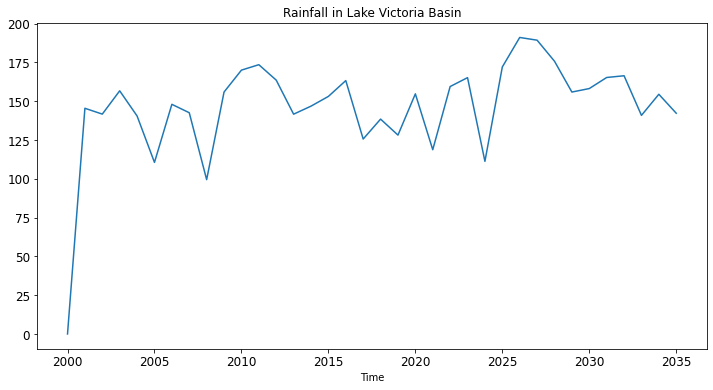

In [9]:
(df_victoria_basin.groupby(by='Time')[['Total']]
 .sum()
 .plot(figsize=(12, 6), title='Rainfall in Lake Victoria Basin', fontsize=12, legend=False))

The rainfall amount is is expected to be at it's peak at around 2028. Before then, we can see that the amount peaked in 2012.
Calculating the rolling average of rainfall over 5 years, we see that the average amounts are expected to go up in the years to come as in the plot below.

<AxesSubplot:title={'center':'Rolling average (5 years) of rainfall in the Lake Victoria Basin'}, xlabel='Time'>

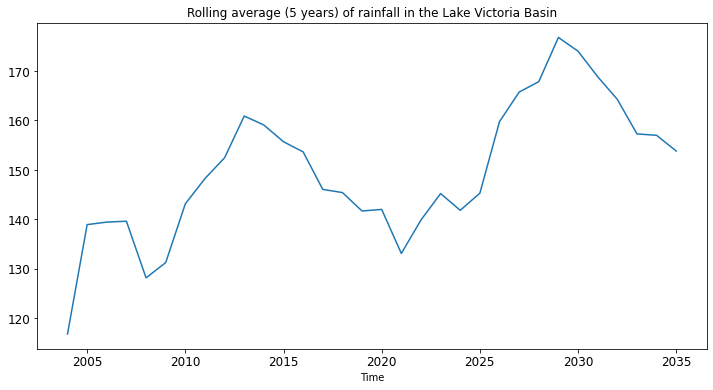

In [10]:
(df_victoria_basin.groupby(by='Time')[['Total']]
 .sum()
 .rolling(5)
 .mean()
 .plot(figsize=(12, 6), title='Rolling average (5 years) of rainfall in the Lake Victoria Basin', fontsize=12, legend=False)
)

Let's find out the sub region with highest and lowest rainfall in the region.

In [11]:
overall = df_victoria_basin.groupby(by='Sub_Region').sum()[['Total']].sort_values(by='Total', ascending=False)
overall.head()

,Total
Sub_Region,
Victoria,1997.464
Nile,1242.123
Simiyu,1041.753
Kagera,983.485


In [12]:
highest_sub = overall.index.values[0]
lowest_sub = overall.index.values[-1]
print ('Highest rain in: ', highest_sub)
print ('Lowest rain in: ', lowest_sub)

Highest rain in:  Victoria
Lowest rain in:  Kagera


The sub regions with highest annual rainfall is **Victoria** with a total annual rainfall of 1997.464 whereas the sub regio with lowest annual rainfall is **Kagera** with a total of 983.485mm

<AxesSubplot:title={'center':'Sub_Region wise Average Annual Rainfall'}, xlabel='Sub_Region'>

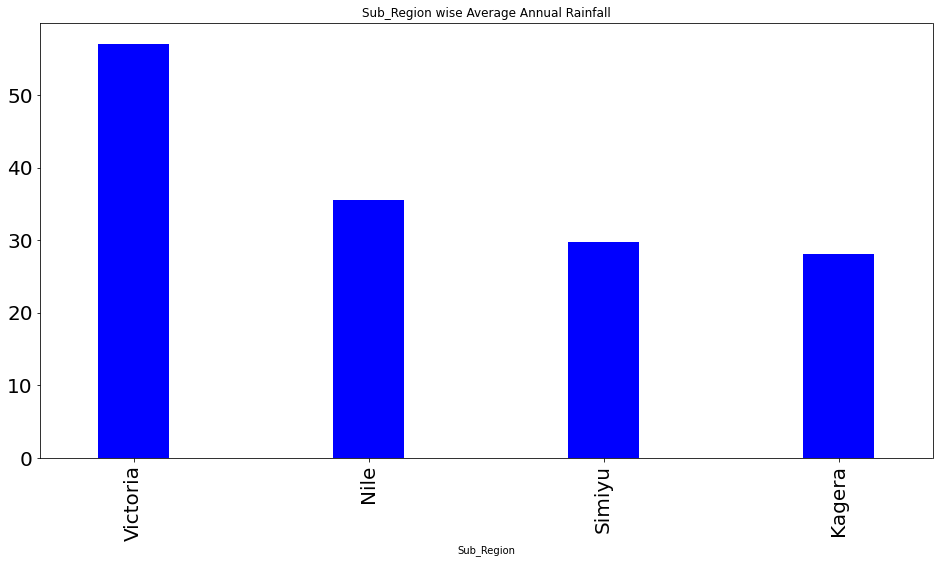

In [13]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df_victoria_basin.groupby('Sub_Region').mean().sort_values(by='Total', ascending=False)['Total'].plot(kind='bar', color='b',width=0.3,title='Sub_Region wise Average Annual Rainfall', fontsize=20)

Looking at the overall seasonality across the year in the region, 

In [14]:
df_victoria_basin['Dec-Feb'] = (df_victoria_basin['Jan.'] + df_victoria_basin['Feb.']+df_victoria_basin['Dec.'])
df_victoria_basin['March-May']= (df_victoria_basin['March']+df_victoria_basin['April']+df_victoria_basin['May'])
df_victoria_basin['June-Aug']= (df_victoria_basin['June']+df_victoria_basin['July']+df_victoria_basin['Aug.'])
df_victoria_basin['Sept-Nov']= (df_victoria_basin['Sept.']+df_victoria_basin['Oct.']+df_victoria_basin['Nov.'])

Text(0, 0.5, 'Rainfall (in mm)')

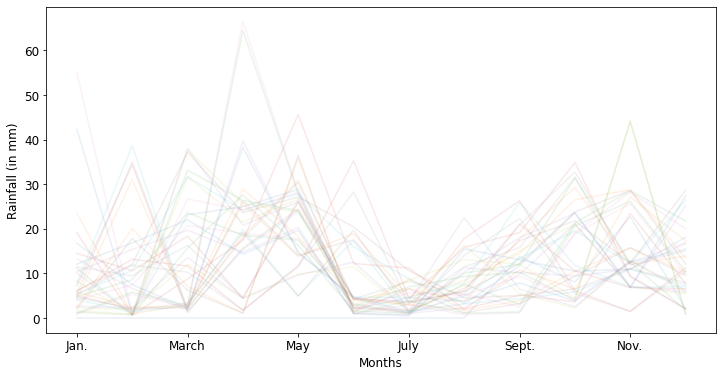

In [15]:
drop_col = ['Total','Dec-Feb','March-May','June-Aug','Sept-Nov']

fig, ax = plt.subplots()

(df_victoria_basin.groupby(by='Time')
 .sum()
 .drop(drop_col, axis = 1)
 .T
 .plot(alpha=0.1, figsize=(12, 6), legend=False, fontsize=12, ax=ax)
)

ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Rainfall (in mm)', fontsize=12)

As expected, we have a peak around April which falls in the season when we experience heavy rains.

Looking at sub region level variation in rainfall, we see that:

<AxesSubplot:xlabel='Sub_Region', ylabel='Total'>

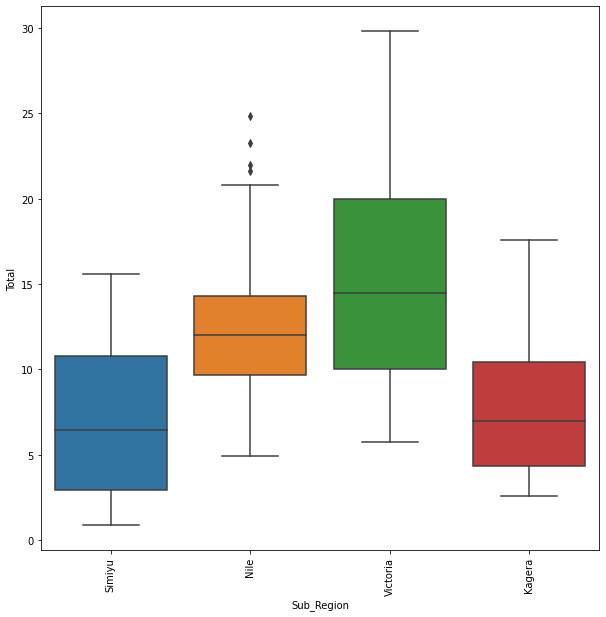

In [16]:
fig = plt.figure(figsize=(5, 10))
plt.xticks(rotation='vertical')
sns.boxplot(x='Sub_Region', y='Total', data=df_victoria_basin)

Rainfall in Victoria region is spread out over a larger scope as compared to other sub regions.